In [1]:
from beanie import init_beanie
from motor.motor_asyncio import AsyncIOMotorClient
from tropic.api.documents import PolymerisationDocument

await init_beanie(
    database=AsyncIOMotorClient("mongodb://localhost:27017")["tropic"],
    document_models=[PolymerisationDocument,],
)
polys = await PolymerisationDocument.find_all().to_list()


[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Normalizer
[13:24:47] Initializing MetalDisconnector
[13:24:47] Running MetalDisconnector
[13:24:47] Initializing Normalizer
[13:24:47] Running Nor

In [134]:
import matplotlib.pyplot as plt

plt.style.use("style.mplstyle")

Duplicate key in file 'style.mplstyle', line 30 ('lines.markersize: 4')


27


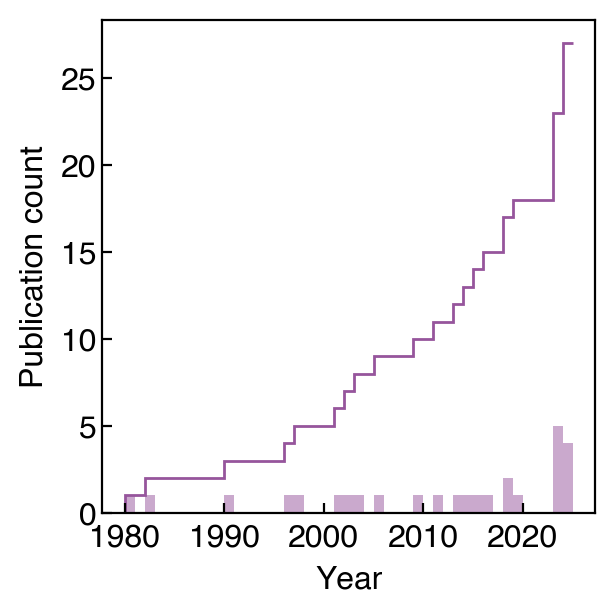

In [ ]:
import numpy as np

def plot_year_hist(ax):
    dois = {p.metadata.doi: p.metadata.year for p in polys if p.metadata.doi and p.metadata.year}
    years = np.array(list(dois.values()))
    bins = years.max() - years.min()     
    ax.hist(years, bins=bins, color="C0", alpha=0.5)

    # plot cumulative histogram
    _, _, patches = ax.hist(years, bins=bins, cumulative=True, histtype="step", color="C0")
    patches[0].set_xy(patches[0].get_xy()[:-1])  # remove last point

    ax.set(xlabel="Year", ylabel="Publication count")
    ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]))

fig, ax = plt.subplots()
plot_year_hist(ax)

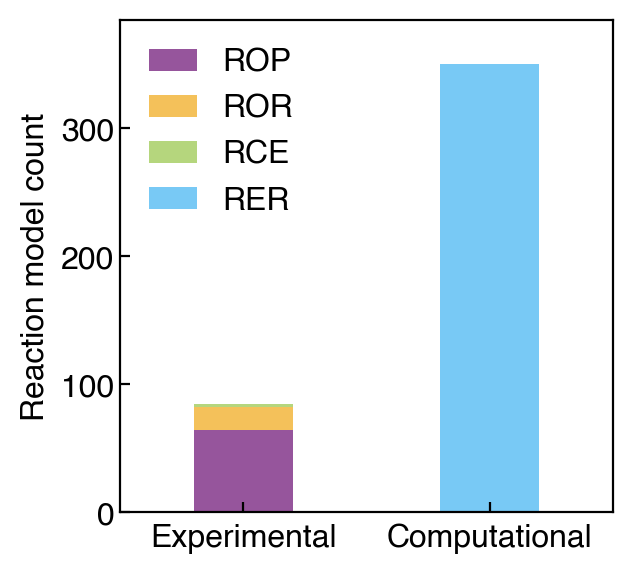

In [136]:
from collections import Counter

def plot_polymerisation_type(ax):
    exp_counts = Counter([p.type for p in polys if p.parameters.is_experimental])
    comp_counts = Counter([p.type for p in polys if not p.parameters.is_experimental])
    types = ["ROP", "ROR", "RCE", "RER"]
    data = {type: [exp_counts.get(type, 0), comp_counts.get(type, 0)] for type in types}
    max_count = max(max(count) for count in data.values())

    bottom = np.zeros(2)
    x = ["Experimental", "Computational"]
    for type, count in data.items():
        ax.bar(x, count, 0.4, label=type, bottom=bottom)
        bottom += count

    ax.legend()
    ax.set(ylabel="Reaction model count", ylim=(0, max_count * 1.1), xlim=(-0.5, 1.5))
    ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]))

fig, ax = plt.subplots()
plot_polymerisation_type(ax)

In [150]:
def get_monomer_type(func_groups):
    func_groups = [f.replace(" ", "") for f in func_groups]
    if (
        ("O=C([O][R])[N]([R])[R]" in func_groups)
        or ("O=[C]([R])[N]([R])[R]" in func_groups)
        or ("O=[C]1[R][O]C[N]1[R]" in func_groups)
        or ("O=C1OC[N]1[R]" in func_groups)
    ):
        return "Lm"
    if (
        ("S=C([O][R])[S][R]" in func_groups)
        or ("S=C([O][R])[O][R]" in func_groups)
        or ("S=C[O][R]" in func_groups)
    ):
        return "tnL"
    elif (
        ("S=C[S][R]" in func_groups)
        or ("O=C([S][R])[S][R]" in func_groups)
        or ("S=C([S][R])[S][R]" in func_groups)
    ):
        return "dtL"
    elif (
        ("O=[C]([R])[S][R]" in func_groups)
        or ("O=[C]([R])SC[O][R]" in func_groups)
        or ("O=C([O][R])[S][R]" in func_groups)
    ):
        return "tL"
    elif ("O=C([O][R])[O][R]" in func_groups) or ("O=C1OCO1" in func_groups):
        return "CC"
    elif (
        ("O=[C]([R])[O][R]" in func_groups)
        or ("C=CC(=O)[O][R]" in func_groups)
        or ("C=CO[C](=O)[R]" in func_groups)
        or ("O=[C](O)[R]" in func_groups)
    ):
        return "L"
    else:
        return "other"

for p in polys:
    print(p.monomer.functional_groups)
    # print(get_monomer_type(p.monomer.functional_groups))
monomer_type = {p.monomer.smiles: get_monomer_type(p.monomer.functional_groups) for p in polys}

types = set(monomer_type.values())
types



['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C(O[R])O[R]']
['O=C(O[R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['C=COC(=O)[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]', 'O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['O=C([R])O[R]']
['

{'CC', 'other'}

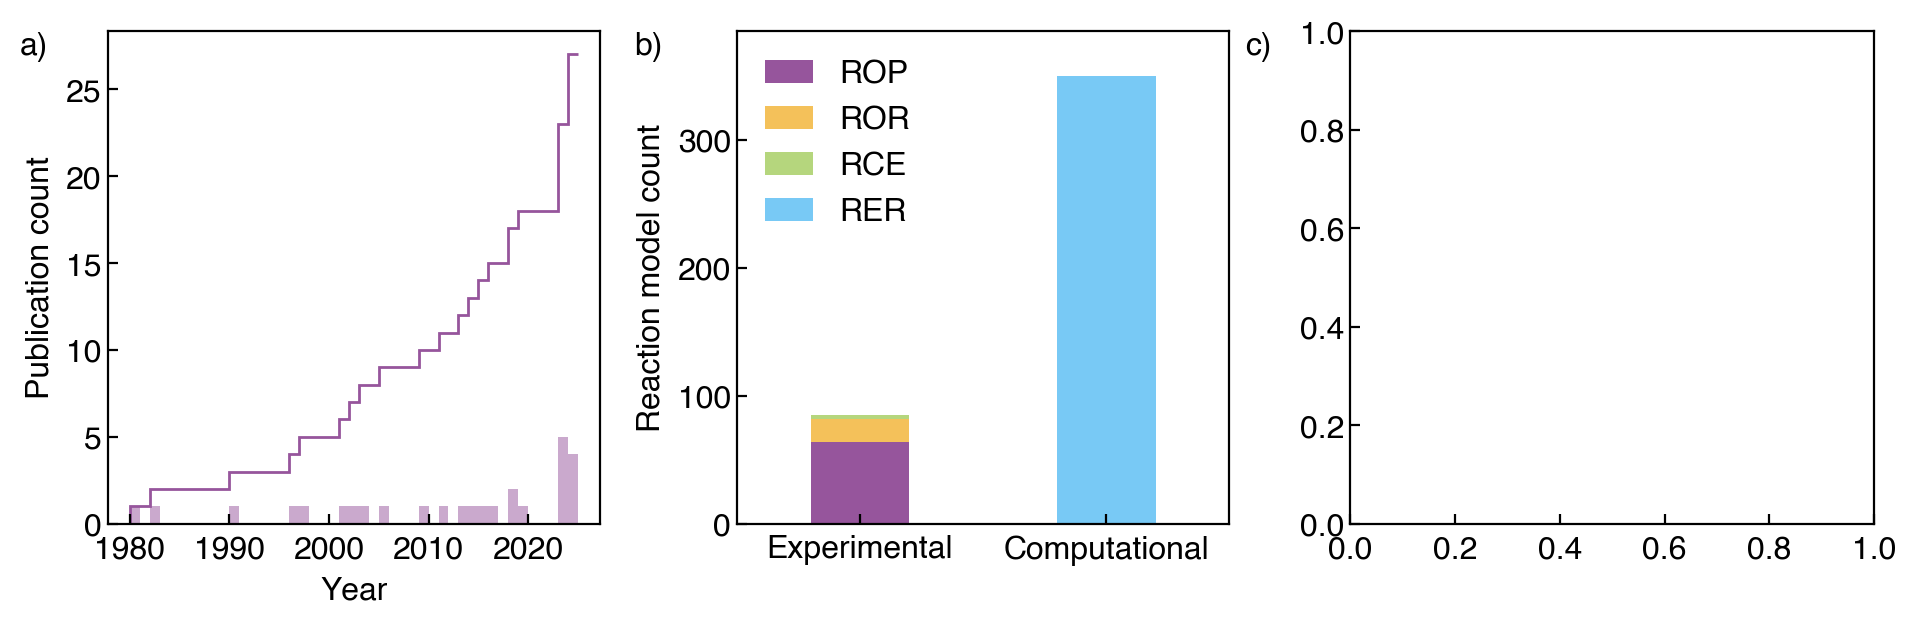

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11.5, 3.2))

plot_year_hist(ax1)
plot_polymerisation_type(ax2)

ax1.text(-0.12, 1, "a)", transform=ax1.transAxes, va="top", ha="right")
ax2.text(-0.15, 1, "b)", transform=ax2.transAxes, va="top", ha="right")
ax3.text(-0.15, 1, "c)", transform=ax3.transAxes, va="top", ha="right")

plt.savefig("polymerisation_stats.pdf", bbox_inches="tight", pad_inches=0)

In [155]:
print("Number of references:",  len({p.metadata.doi for p in polys if p.metadata.doi}))
print("Number of monomers:",  len({p.monomer.smiles for p in polys}))

Number of references: 27
Number of monomers: 171


In [ ]:


    # # Group dataframe by monomer_smiles and add experimental/func_group columns
    # monomer_grouping = df.groupby("monomer_smiles", group_keys=True)
    # df = monomer_grouping.first()
    # df["experimental"] = monomer_grouping["is_experimental"].apply(get_experimental)
    # df["func_group_pretty"] = df["func_group"].apply(get_func_group)

    # experimental_count = df.groupby(["experimental"]).count()
    # func_group_count = (
    #     df.groupby(["experimental", "func_group_pretty"]).count().reset_index()
    # )
    # func_group_count = func_group_count.groupby("experimental").apply(
    #     lambda x: [x["func_group_pretty"].to_list(), x["poly_id"].to_list()]
    # )
    # func_group_labels = [
    #     [f"{fg}: {count}" for fg, count in zip(*pair)]
    #     for pair in func_group_count.values
    # ]
    # func_group_labels = ["\n".join(fg_list) for fg_list in func_group_labels]

    # wedges, *_ = ax.pie(
    #     experimental_count["poly_id"],
    #     # labels=experimental_count.index.to_list(),
    #     # wedgeprops=dict(width=0.5, edgecolor="w"),
    #     autopct="%1.0f%%",
    #     # startangle=90,
    # )

    # kw = {
    #     "arrowprops": {"arrowstyle": "-"},
    #     "bbox": {"boxstyle": "square,pad=0.3", "fc": "w", "ec": "k", "lw": 0.72},
    #     "zorder": 0,
    #     "va": "center",
    # }
    # for i, wedge in enumerate(wedges):
    #     ang = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    #     x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    #     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    #     connectionstyle = f"angle,angleA=0,angleB={ang}"
    #     kw["arrowprops"].update({"connectionstyle": connectionstyle})
    #     ax.annotate(
    #         func_group_labels[i],
    #         xy=(x, y),
    #         xytext=(1.35 * np.sign(x), 1.4 * y),
    #         horizontalalignment=horizontalalignment,
    #         **kw,
    #     )

    # ax.set_title("Distribution of Monomer Functional Groups", y=-0.01)
    # plt.legend(wedges, experimental_count.index.to_list(), loc="upper right")

    # # plt.show()
    # plt.savefig("assets/functional_groups.svg")